# Experiment 1: Working with Python Packages
## Numpy, Scipy, Scikit-Learn, Matplotlib

**Objectives:**
1. Load and explore various datasets
2. Perform Exploratory Data Analysis (EDA)
3. Create visualizations (save as PNG and EPS at 600 DPI)
4. Identify ML task type for each dataset
5. Determine suitable algorithms

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
import os
from PIL import Image
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100  # For display

def save_plot(filename):
    plt.savefig(f'../plots/png/{filename}.png', dpi=600, bbox_inches='tight')
    plt.savefig(f'../plots/eps/{filename}.eps', dpi=600, bbox_inches='tight')
    print(f"✓ Saved: {filename}.png and {filename}.eps")

print("Libraries imported successfully!")

Libraries imported successfully!


## Dataset 1: Iris Dataset
### Loading and EDA

In [2]:
iris_df = pd.read_csv('../dataset/Iris Dataset/iris.csv')
print("Shape:", iris_df.shape)
print(iris_df.head())
print("\nSummary Statistics:")
print(iris_df.describe())

Shape: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Visualizations (Iris)
- Histogram Distribution
- Box Plot
- Correlation Heatmap
- Pair Plot

✓ Saved: iris_histograms.png and iris_histograms.eps


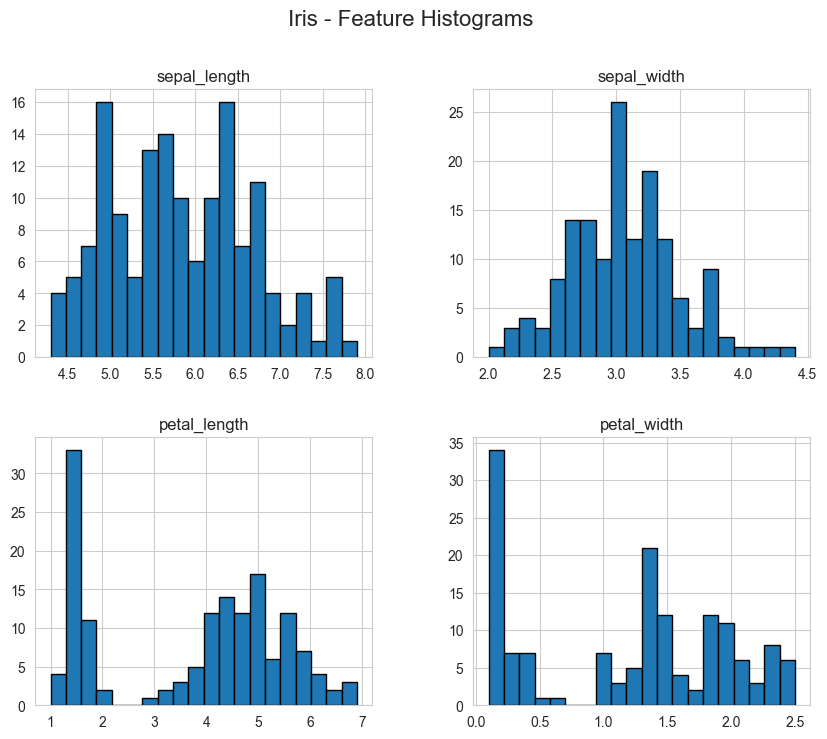

✓ Saved: iris_boxplots.png and iris_boxplots.eps


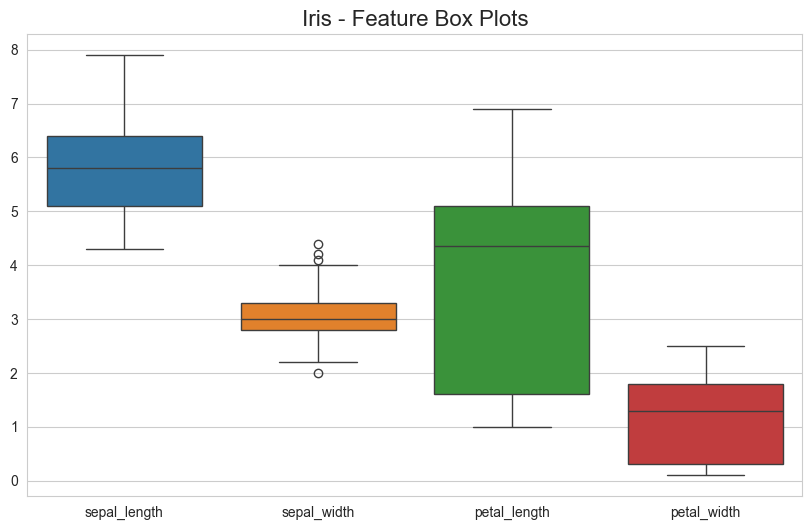

✓ Saved: iris_heatmap.png and iris_heatmap.eps


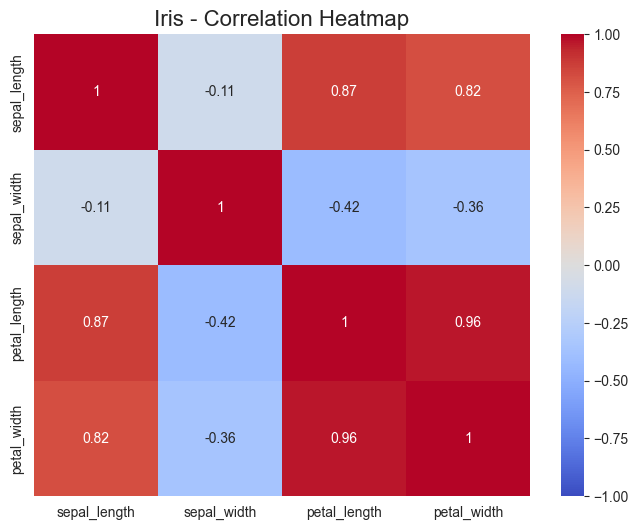

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Saved: iris_pairplot.png and iris_pairplot.eps


<Figure size 1000x1000 with 0 Axes>

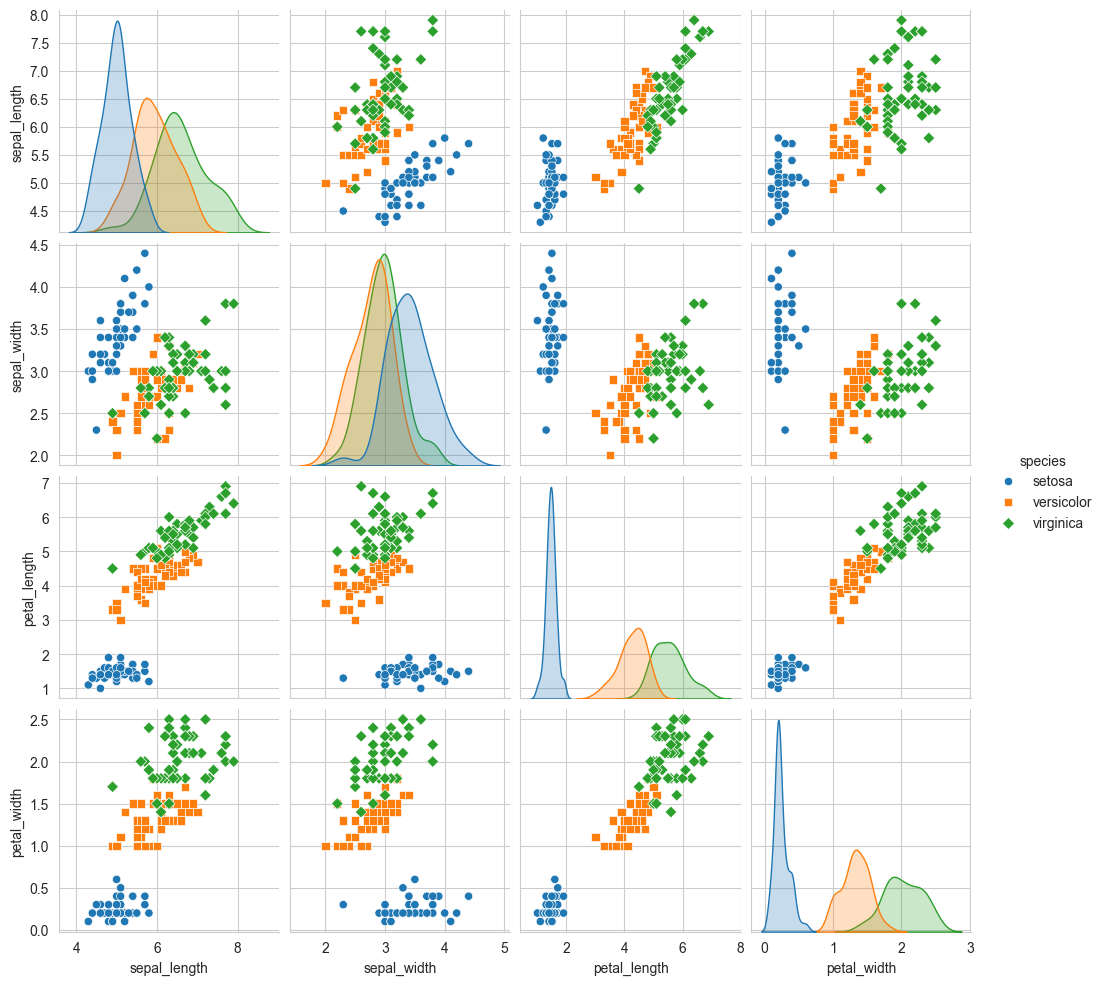

In [3]:
# 1. Histogram Distribution
iris_df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Iris - Feature Histograms', fontsize=16)
save_plot('iris_histograms')
plt.show()

# 2. Box Plot (Outlier Detection)
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.drop('species', axis=1))
plt.title('Iris - Feature Box Plots', fontsize=16)
save_plot('iris_boxplots')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Iris - Correlation Heatmap', fontsize=16)
save_plot('iris_heatmap')
plt.show()

# 4. Pair Plot
plt.figure(figsize=(10, 10))
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
save_plot('iris_pairplot')
plt.show()

---
## Dataset 2: Loan Amount Prediction
### Loading and EDA

In [4]:
loan_df = pd.read_csv('../dataset/loan_prediction/loan_dataset_20000.csv')
# Select a subset of numeric columns for clearer visualization
loan_numeric = loan_df.select_dtypes(include=[np.number]).dropna().iloc[:, :6] 
print("Shape:", loan_df.shape)
print(loan_df.head())

Shape: (20000, 22)
   age  gender marital_status education_level  annual_income  monthly_income  \
0   59    Male        Married        Master's       24240.19         2020.02   
1   72  Female        Married      Bachelor's       20172.98         1681.08   
2   49  Female         Single     High School       26181.80         2181.82   
3   35  Female         Single     High School       11873.84          989.49   
4   63   Other         Single           Other       25326.44         2110.54   

  employment_status  debt_to_income_ratio  credit_score  loan_amount  ...  \
0          Employed                 0.074           743     17173.72  ...   
1          Employed                 0.219           531     22663.89  ...   
2          Employed                 0.234           779      3631.36  ...   
3          Employed                 0.264           809     14939.23  ...   
4          Employed                 0.260           663     16551.71  ...   

  loan_term  installment  grade_subgr

### Visualizations (Loan)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Saved: loan_hist_target.png and loan_hist_target.eps


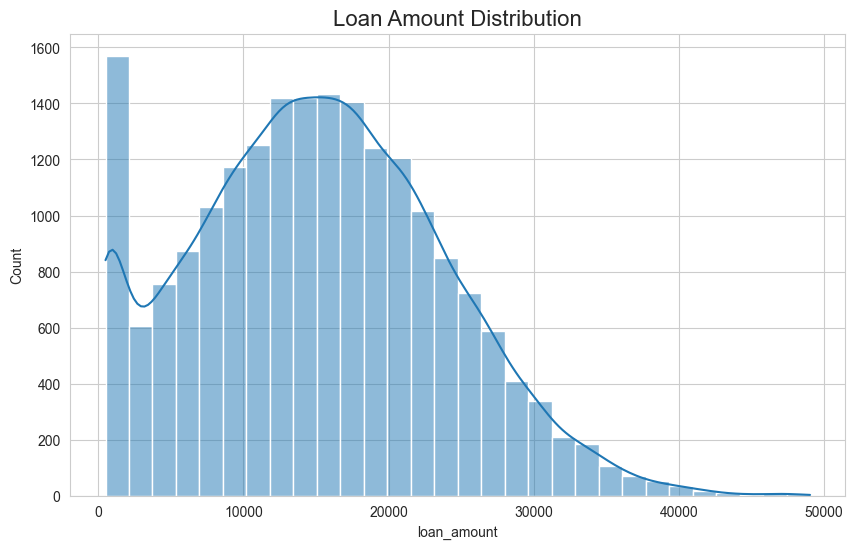

✓ Saved: loan_boxplot.png and loan_boxplot.eps


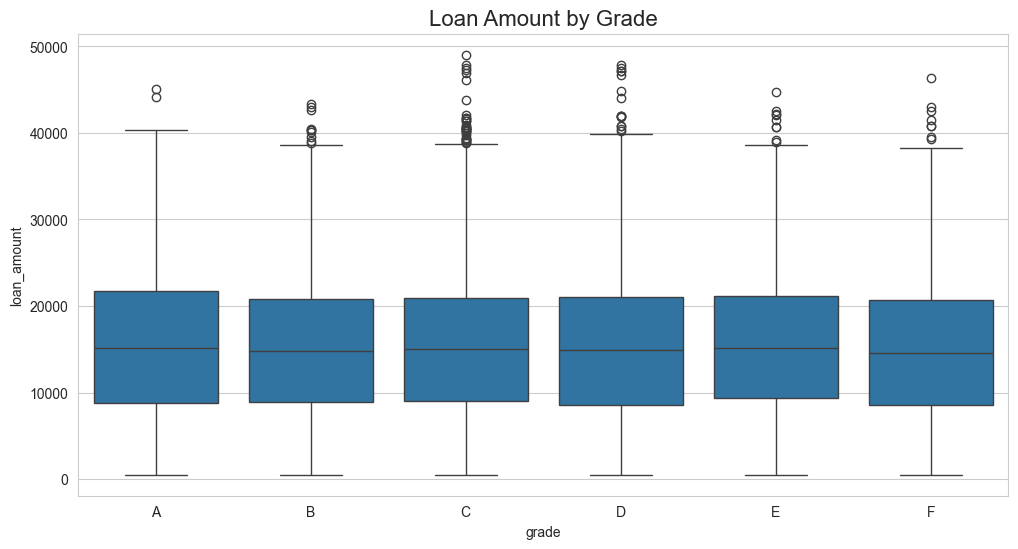

✓ Saved: loan_heatmap.png and loan_heatmap.eps


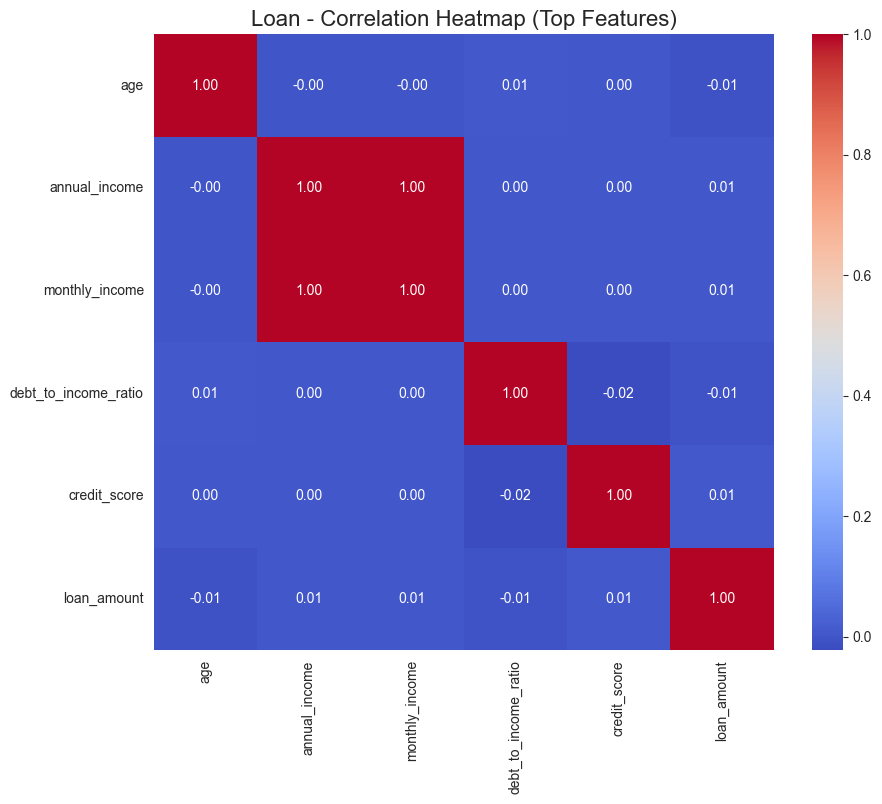

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Saved: loan_pairplot.png and loan_pairplot.eps


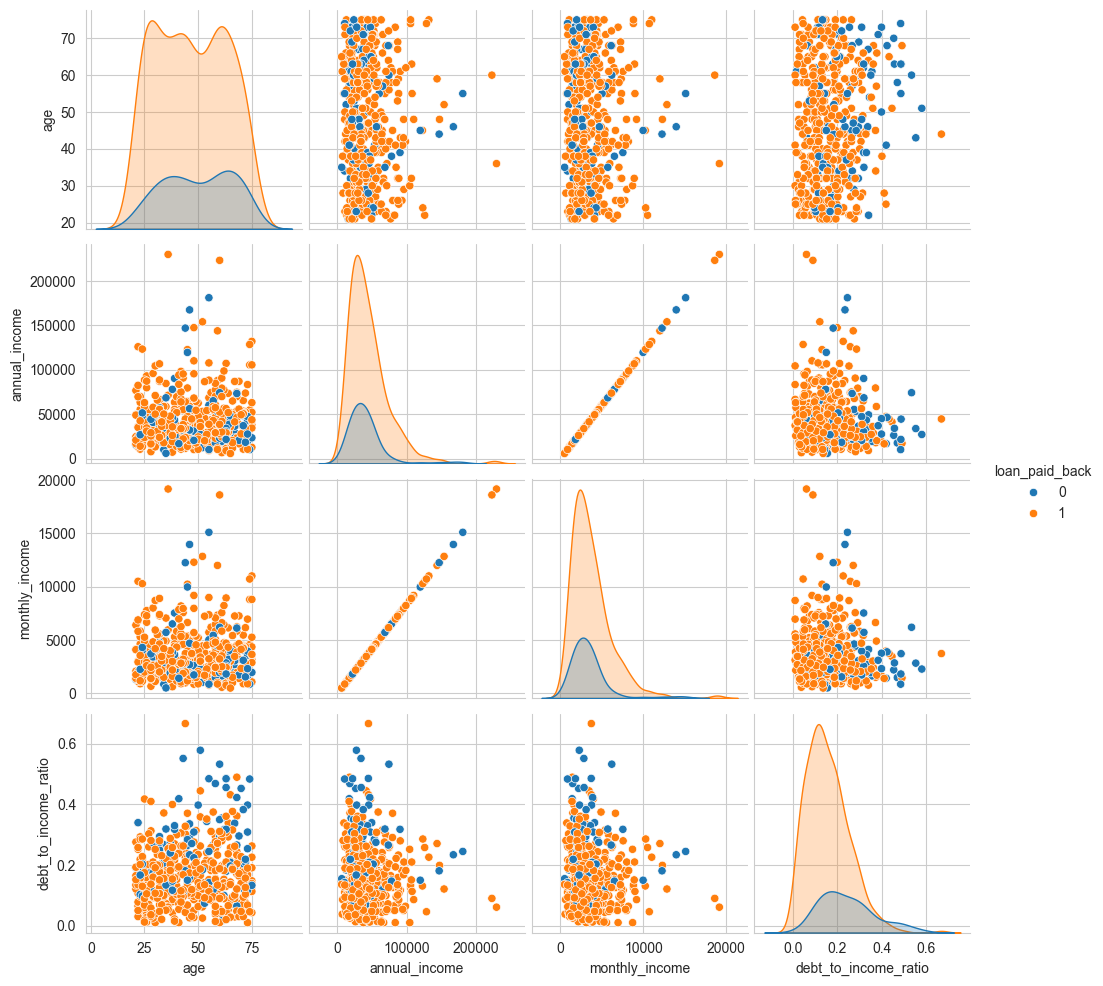

In [5]:
# 1. Histogram Distribution (Target)
plt.figure(figsize=(10, 6))
if 'loan_amount' in loan_df.columns:
    sns.histplot(loan_df['loan_amount'], bins=30, kde=True)
    plt.title('Loan Amount Distribution', fontsize=16)
    save_plot('loan_hist_target')
    plt.show()

# 2. Box Plot (vs Grade if available, else generic)
plt.figure(figsize=(12, 6))
if 'grade_subgrade' in loan_df.columns:
    # Take just the grade (first char)
    loan_df['grade'] = loan_df['grade_subgrade'].str[0]
    sns.boxplot(x='grade', y='loan_amount', data=loan_df.sort_values('grade'))
    plt.title('Loan Amount by Grade', fontsize=16)
else:
    sns.boxplot(data=loan_numeric)
    plt.title('Loan Numeric Features Box Plot', fontsize=16)
save_plot('loan_boxplot')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loan_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Loan - Correlation Heatmap (Top Features)', fontsize=16)
save_plot('loan_heatmap')
plt.show()

# 4. Pair Plot (Subset)
# Using a small sample to speed up plotting
sample_loan = loan_df.sample(n=500, random_state=42)
cols_to_plot = loan_numeric.columns[:4].tolist()
if 'loan_paid_back' in loan_df.columns:
    cols_to_plot.append('loan_paid_back')
    sns.pairplot(sample_loan[cols_to_plot], hue='loan_paid_back')
else:
    sns.pairplot(sample_loan[cols_to_plot])
save_plot('loan_pairplot')
plt.show()

---
## Dataset 3: Predicting Diabetes
### Loading and EDA

In [6]:
diabetes_df = pd.read_csv('../dataset/Predicting Diabetes/diabetes_prediction_dataset.csv')
print("Shape:", diabetes_df.shape)
print(diabetes_df.head())

Shape: (100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


### Visualizations (Diabetes)

✓ Saved: diabetes_histograms.png and diabetes_histograms.eps


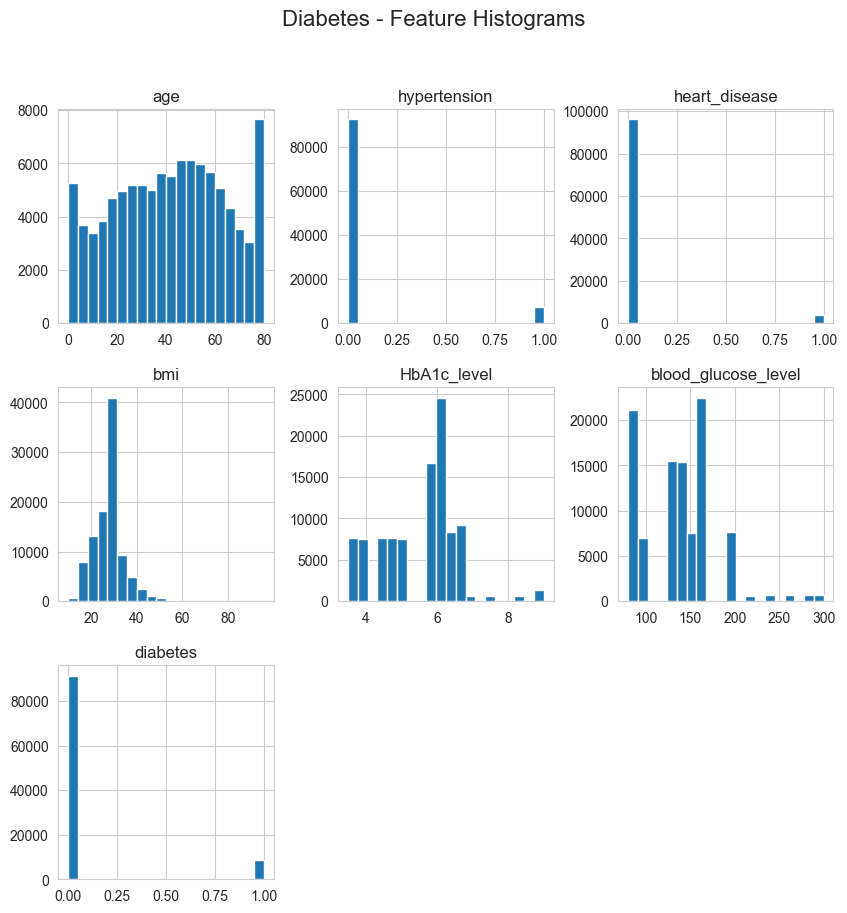

✓ Saved: diabetes_boxplot.png and diabetes_boxplot.eps


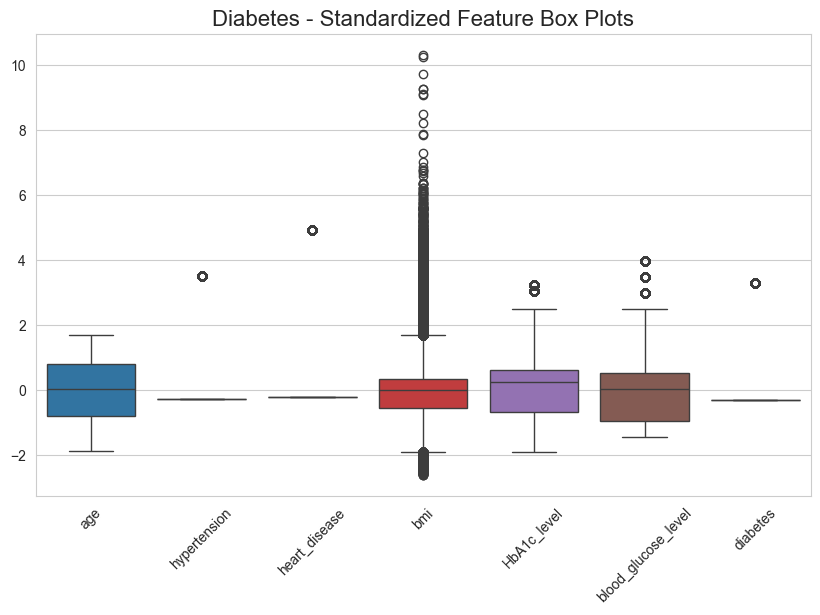

✓ Saved: diabetes_heatmap.png and diabetes_heatmap.eps


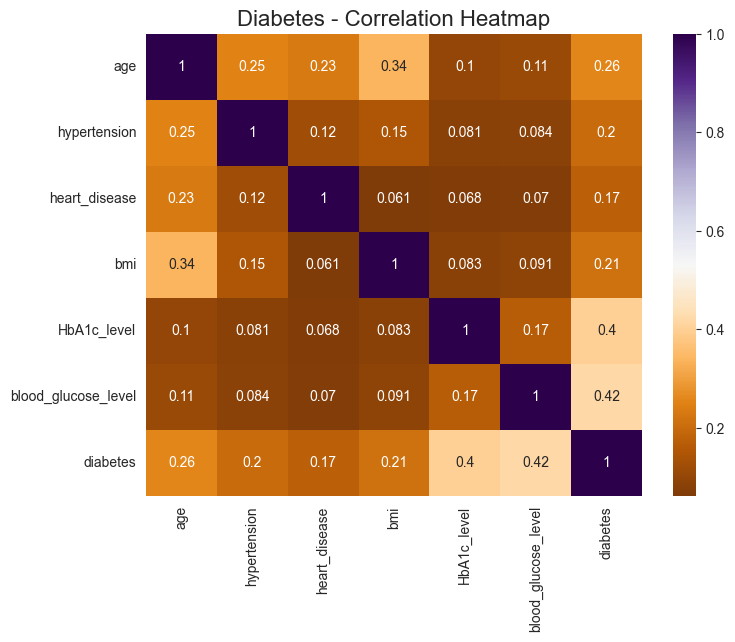

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Saved: diabetes_pairplot.png and diabetes_pairplot.eps


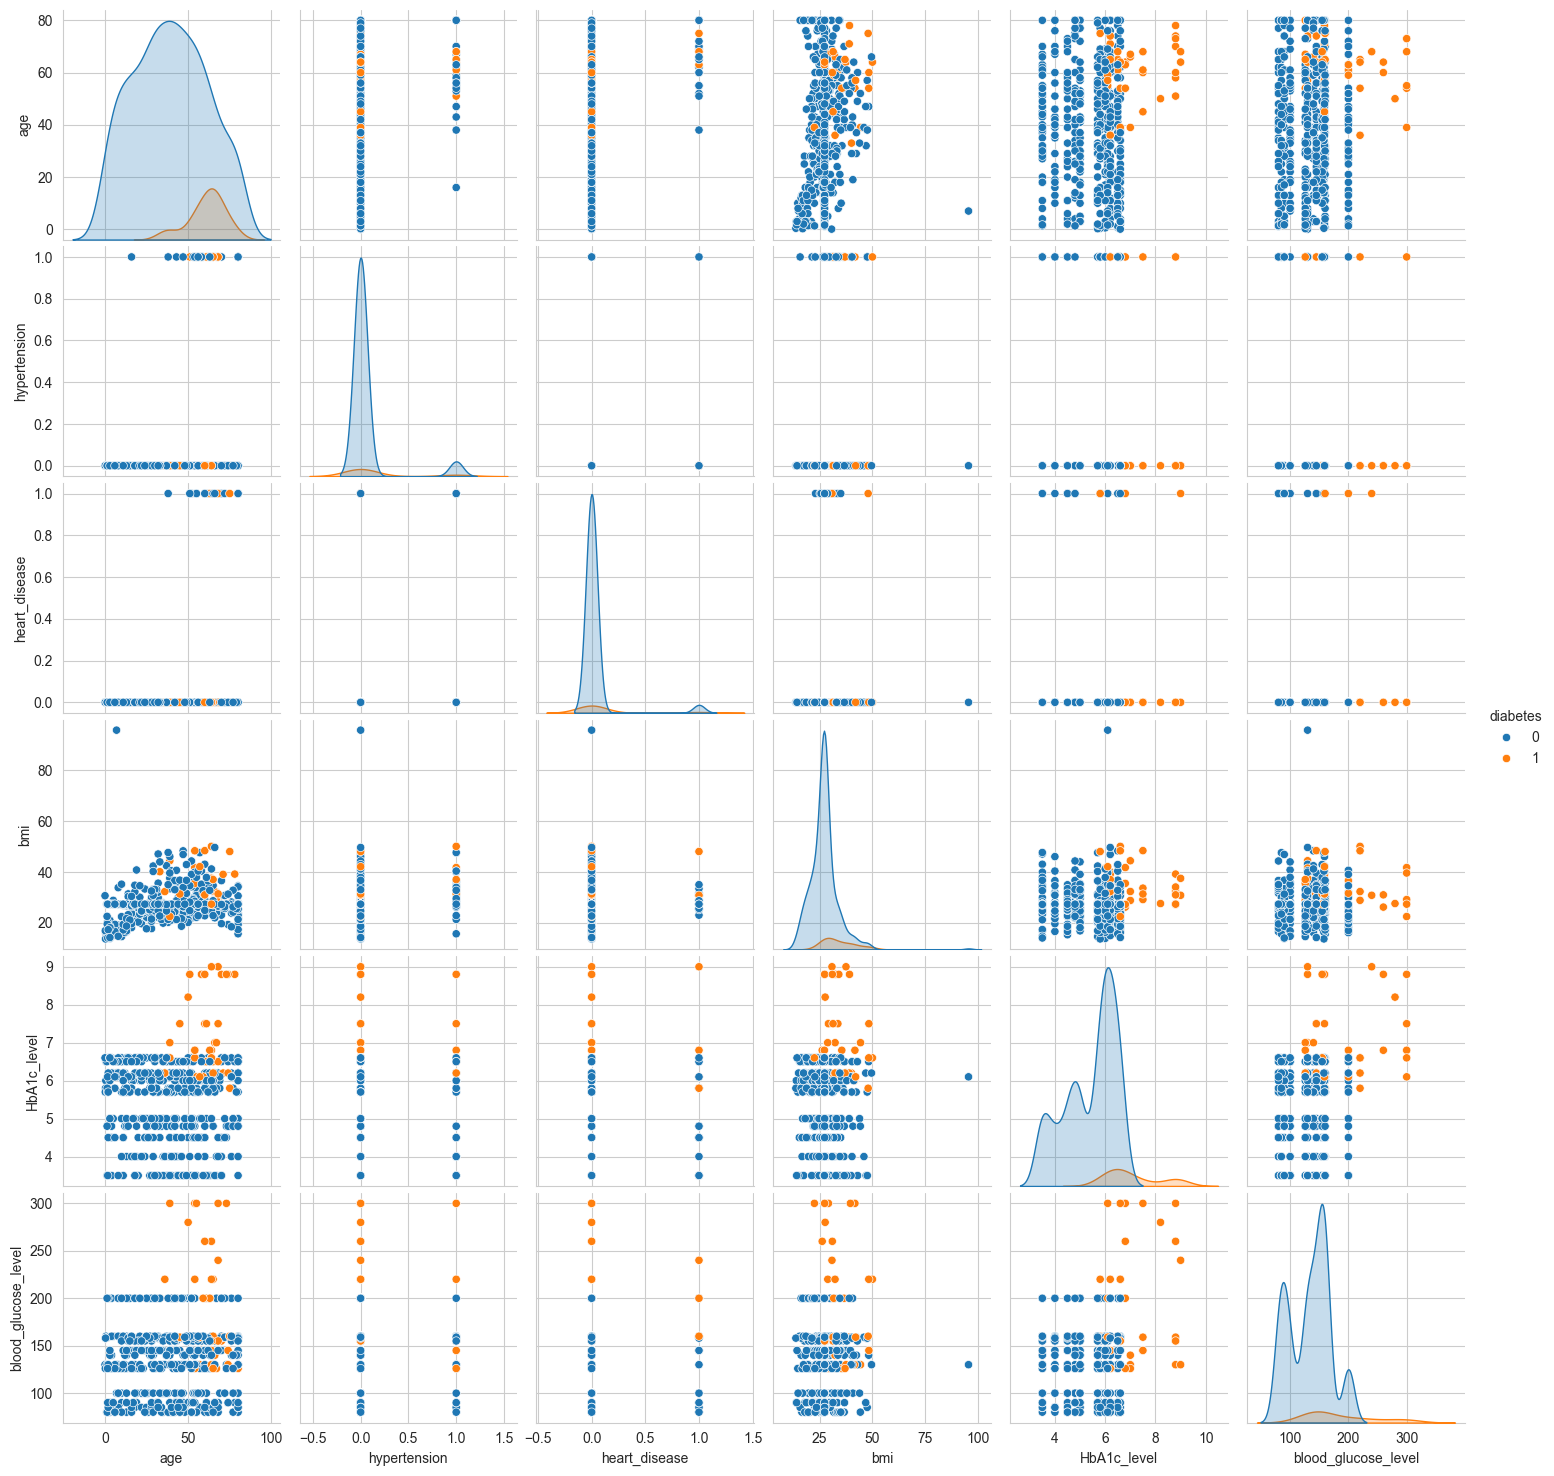

In [7]:
# 1. Histograms
diabetes_df.hist(figsize=(10, 10), bins=20)
plt.suptitle('Diabetes - Feature Histograms', fontsize=16)
save_plot('diabetes_histograms')
plt.show()

# 2. Box Plots
plt.figure(figsize=(10, 6))
num_cols = diabetes_df.select_dtypes(include=[np.number]).columns
# Standarize for better boxplot visualization together
df_std = pd.DataFrame(StandardScaler().fit_transform(diabetes_df[num_cols]), columns=num_cols)
sns.boxplot(data=df_std)
plt.xticks(rotation=45)
plt.title('Diabetes - Standardized Feature Box Plots', fontsize=16)
save_plot('diabetes_boxplot')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_df[num_cols].corr(), annot=True, cmap='PuOr')
plt.title('Diabetes - Correlation Heatmap', fontsize=16)
save_plot('diabetes_heatmap')
plt.show()

# 4. Pair Plot (with Diabetes Hue)
if 'diabetes' in diabetes_df.columns:
    # Sample for speed
    sample_dia = diabetes_df.sample(n=500, random_state=42)
    sns.pairplot(sample_dia, hue='diabetes')
    save_plot('diabetes_pairplot')
    plt.show()

---
## Dataset 4: Email Spam Classification
### Loading and Feature Engineering

In [8]:
spam_df = pd.read_csv('../dataset/Classification of Email spam/email.csv')
if 'Message' in spam_df.columns:
    spam_df['message_len'] = spam_df['Message'].astype(str).apply(len)
    spam_df['word_count'] = spam_df['Message'].astype(str).apply(lambda x: len(x.split()))

print(spam_df.head())

  Category                                            Message  message_len  \
0      ham  Go until jurong point, crazy.. Available only ...          111   
1      ham                      Ok lar... Joking wif u oni...           29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3      ham  U dun say so early hor... U c already then say...           49   
4      ham  Nah I don't think he goes to usf, he lives aro...           61   

   word_count  
0          20  
1           6  
2          28  
3          11  
4          13  


### Visualizations (Spam)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Saved: spam_hist_length.png and spam_hist_length.eps


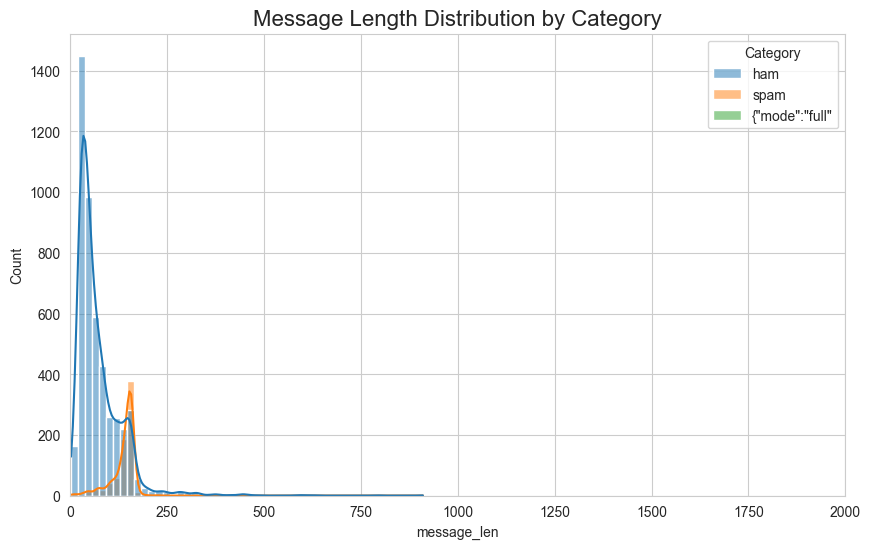

✓ Saved: spam_boxplot.png and spam_boxplot.eps


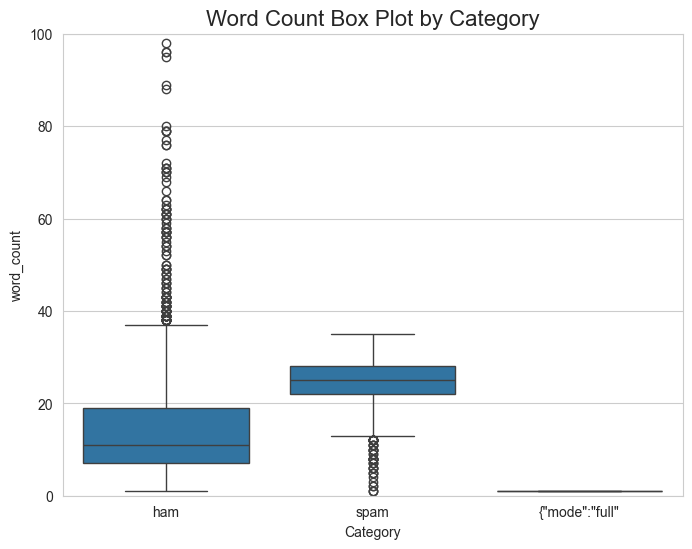

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Saved: spam_pairplot.png and spam_pairplot.eps


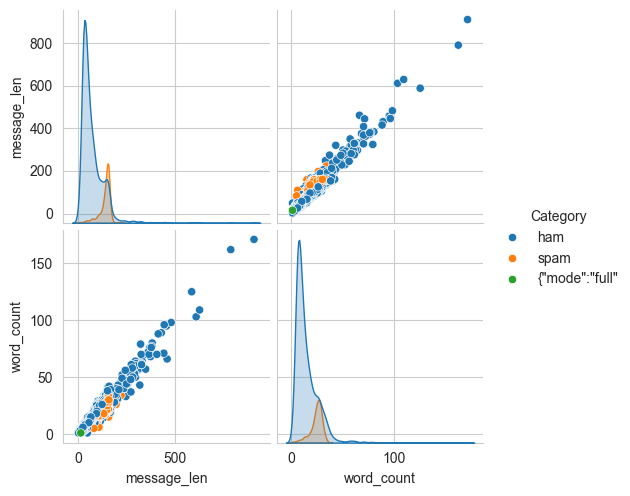

In [9]:
# 1. Histogram (Message Length)
plt.figure(figsize=(10, 6))
sns.histplot(data=spam_df, x='message_len', hue='Category', bins=50, kde=True)
plt.title('Message Length Distribution by Category', fontsize=16)
plt.xlim(0, 2000) # Limit x-axis for better visibility
save_plot('spam_hist_length')
plt.show()

# 2. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='word_count', data=spam_df)
plt.title('Word Count Box Plot by Category', fontsize=16)
plt.ylim(0, 100) # Zoom in
save_plot('spam_boxplot')
plt.show()

# 3. Pair Plot (Length vs Word Count)
sns.pairplot(spam_df[['message_len', 'word_count', 'Category']], hue='Category')
save_plot('spam_pairplot')
plt.show()

---
## Dataset 5: Handwritten Character Recognition (MNIST)
### Loading and Preprocessing

In [ ]:
mnist_df = pd.read_csv('../dataset/Handwritten character recognition/english.csv')
# This dataset typically has image paths. Let's see if we can do pixel statistics
# Or if we don't have pixel values directly, we might need to load images to get stats
# Check columns
print(mnist_df.columns)

# assuming 'image' column contains paths
# We will load a subset of images to calculate statistics for EDA
img_dir = '../dataset/Handwritten character recognition'

pixel_means = []
labels = []

if os.path.exists(img_dir):
    # Process first 200 images for EDA statistics to allow for Pairplots/Histograms
    for idx, row in mnist_df.head(200).iterrows():
        img_path = os.path.join(img_dir, row['image'])
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('L') # Grayscale
            img_data = np.array(img)
            pixel_means.append(img_data.mean())
            labels.append(row['label'])
    
    eda_mnist = pd.DataFrame({'mean_intensity': pixel_means, 'label': labels})
    print(eda_mnist.head())
else:
    print("Image folder not found")


Index(['image', 'label'], dtype='str')


   mean_intensity label
0      227.978500     0
1      232.381028     0
2      226.068361     0
3      243.925917     0
4      241.697972     0


### Visualizations (MNIST)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Saved: mnist_hist_intensity.png and mnist_hist_intensity.eps


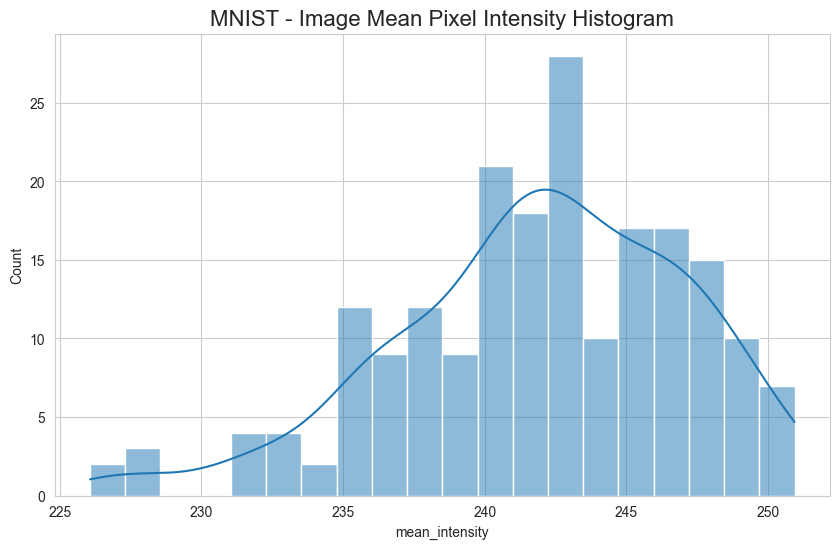

✓ Saved: mnist_boxplot.png and mnist_boxplot.eps


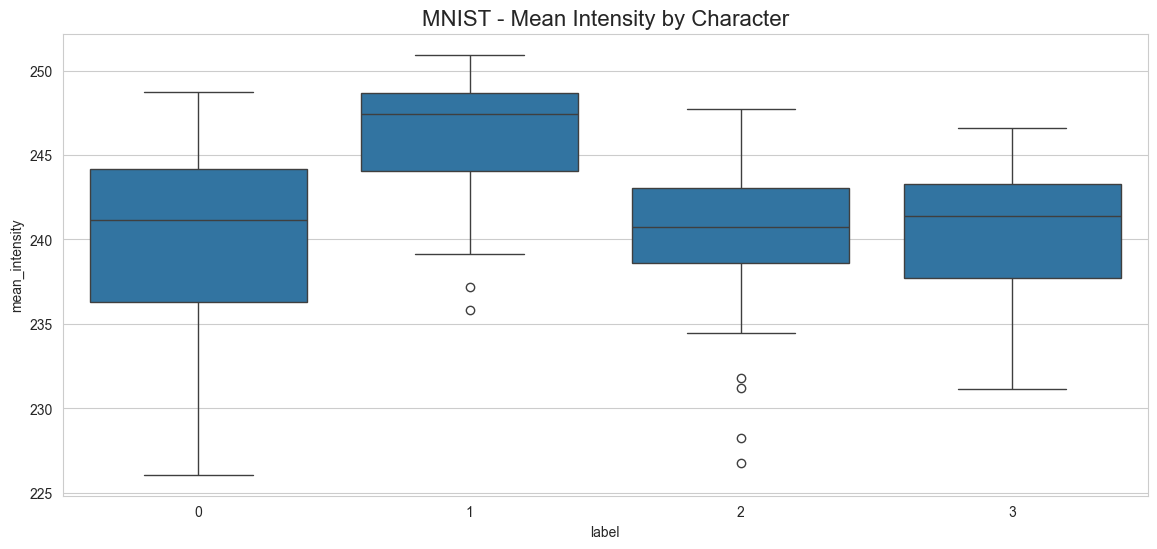

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✓ Saved: mnist_pca_pairplot.png and mnist_pca_pairplot.eps


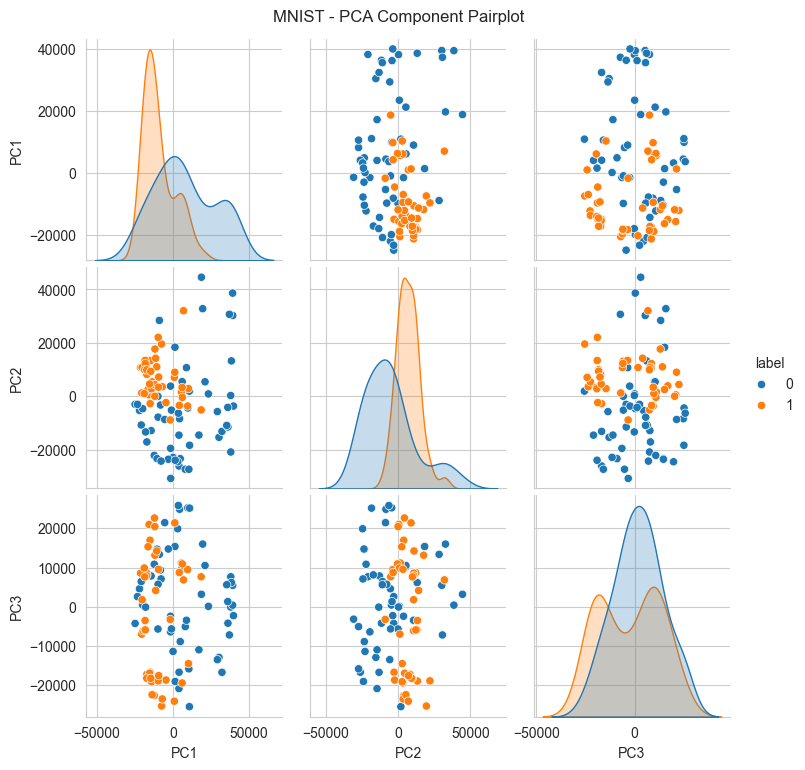

✓ Saved: mnist_heatmap.png and mnist_heatmap.eps


<Figure size 600x600 with 0 Axes>

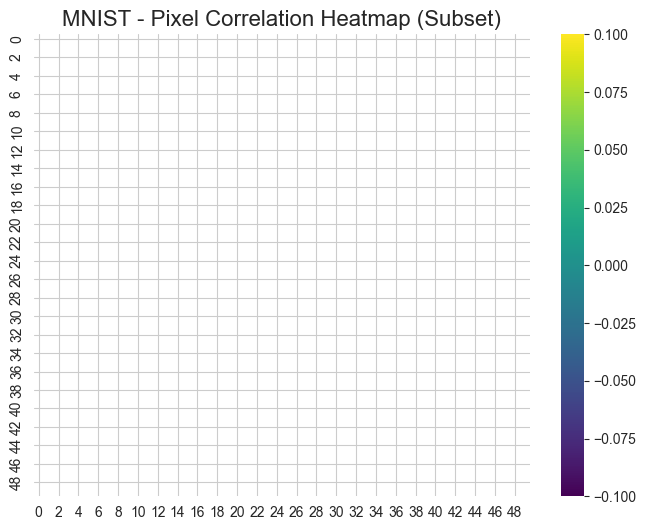

In [11]:
# 1. Histogram of Intensity
if not eda_mnist.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=eda_mnist, x='mean_intensity', bins=20, kde=True)
    plt.title('MNIST - Image Mean Pixel Intensity Histogram', fontsize=16)
    save_plot('mnist_hist_intensity')
    plt.show()

    # 2. Box Plot (Intensity vs Label)
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='label', y='mean_intensity', data=eda_mnist)
    plt.title('MNIST - Mean Intensity by Character', fontsize=16)
    save_plot('mnist_boxplot')
    plt.show()

    # 3. PCA Pair Plot (Simulating pair plot for high dimensional image data)
    # We need to flatten images for this. Using subset.
    images = []
    lbls = []
    img_dir = '../dataset/Handwritten character recognition'
    for idx, row in mnist_df.head(100).iterrows():
        img_path = os.path.join(img_dir, row['image'])
        if os.path.exists(img_path):
            images.append(np.array(Image.open(img_path).convert('L')).flatten())
            lbls.append(row['label'])
    
    if images:
        X = np.array(images)
        pca = PCA(n_components=3)
        X_pca = pca.fit_transform(X)
        pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
        pca_df['label'] = lbls
        
        sns.pairplot(pca_df, hue='label')
        plt.suptitle('MNIST - PCA Component Pairplot', y=1.02)
        save_plot('mnist_pca_pairplot')
        plt.show()

    # 4. Heatmap of a 'Average' Character (e.g. '0')
    # Find all '0' images if available, or just take first image
    if images:
        plt.figure(figsize=(6, 6))
        sns.heatmap(images[0].reshape(900, 1200), cmap='gray') # Assuming original dimensions
        # NOTE: English.csv images are usually 1200x900. Reshaping might require detecting size.
        # Let's just heatmap the PCA covariance for correlation surrogate
        plt.clf()
        plt.figure(figsize=(8, 6))
        sns.heatmap(pd.DataFrame(X).iloc[:, :50].corr(), cmap='viridis') # First 50 pixels
        plt.title('MNIST - Pixel Correlation Heatmap (Subset)', fontsize=16)
        save_plot('mnist_heatmap')
        plt.show()

## Conclusion

We have performed comprehensive EDA on all 5 datasets including Histograms, Box plots, Correlation heatmaps, and Pair plots where applicable. This helps in understanding the data distribution, outliers, and feature relationships.